<a href="https://colab.research.google.com/github/kky107102/ML_TEAM8/blob/main/Stable_Diffusion_2_1_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bbbbbbaan","key":"67f95d8db5a12f213f5b2d2a3731f447"}'}

## Download

### Fake Download


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Fake directory 생성
!mkdir -p fake

# 해당 dataset png파일들만 존재..
!kaggle datasets download -d vitaliykinakh/stable-imagenet1k -p fake --unzip

Dataset URL: https://www.kaggle.com/datasets/vitaliykinakh/stable-imagenet1k
License(s): CC0-1.0
100% 9.80G/9.80G [07:27<00:00, 24.4MB/s]
100% 9.80G/9.80G [07:27<00:00, 23.5MB/s]


In [5]:
# check용

import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = '/content/fake/imagenet1k/000_tench, Tinca tinca'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')
'''
# 랜덤하게 15개의 이미지 파일 선택
random_image_files = random.sample(image_files, 15)

# 선택한 이미지 파일들을 표시
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, image_file in enumerate(random_image_files):
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
'''

폴더 내의 이미지 파일 개수: 101


"\n# 랜덤하게 15개의 이미지 파일 선택\nrandom_image_files = random.sample(image_files, 15)\n\n# 선택한 이미지 파일들을 표시\nfig, axes = plt.subplots(3, 5, figsize=(15, 9))\naxes = axes.flatten()\n\nfor i, image_file in enumerate(random_image_files):\n    image_path = os.path.join(folder_path, image_file)\n    image = Image.open(image_path)\n    axes[i].imshow(image)\n    axes[i].axis('off')\n\nplt.tight_layout()\nplt.show()\n"

In [6]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/fake/imagenet1k'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected/selected_fake_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 10

# 모든 폴더 순회
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)
    # 폴더인지 확인
    if os.path.isdir(folder_path):
        # 폴더 내의 이미지 파일 목록 가져오기
        image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]
        # 랜덤하게 이미지 선택
        selected_real_images = random.sample(image_files, min(num_images_to_select, len(image_files)))
        # 선택된 이미지를 대상 폴더로 복사
        for image_name in selected_real_images:
            source_image_path = os.path.join(folder_path, image_name)
            destination_image_path = os.path.join(destination_folder, image_name)
            shutil.copy(source_image_path, destination_image_path)

print(f"{num_images_to_select}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


10개의 이미지를 랜덤으로 선택하여 /content/selected/selected_fake_images 폴더에 복사했습니다.


In [7]:

import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = 'selected/selected_fake_images'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')
'''
# 랜덤하게 15개의 이미지 파일 선택
random_image_files = random.sample(image_files, 15)

# 선택한 이미지 파일들을 표시
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, image_file in enumerate(random_image_files):
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
'''

폴더 내의 이미지 파일 개수: 9952


"\n# 랜덤하게 15개의 이미지 파일 선택\nrandom_image_files = random.sample(image_files, 15)\n\n# 선택한 이미지 파일들을 표시\nfig, axes = plt.subplots(3, 5, figsize=(15, 9))\naxes = axes.flatten()\n\nfor i, image_file in enumerate(random_image_files):\n    image_path = os.path.join(folder_path, image_file)\n    image = Image.open(image_path)\n    axes[i].imshow(image)\n    axes[i].axis('off')\n\nplt.tight_layout()\nplt.show()\n"

### Real Download

In [8]:
#Fake directory 생성
!mkdir -p real

#1분 정도 걸립니다. content/real 안에 생기도록 설정함.
# 해당 dataset JPEG 파일들만 존재..
!kaggle datasets download -d ifigotin/imagenetmini-1000 -p real --unzip

Dataset URL: https://www.kaggle.com/datasets/ifigotin/imagenetmini-1000
License(s): unknown
100% 3.92G/3.92G [03:24<00:00, 20.2MB/s]
100% 3.92G/3.92G [03:24<00:00, 20.6MB/s]


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = '/content/real/imagenet-mini/train/n01443537'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')
'''
# 랜덤하게 15개의 이미지 파일 선택
random_image_files = random.sample(image_files, 15)

# 선택한 이미지 파일들을 표시
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, image_file in enumerate(random_image_files):
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
'''

In [9]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/real/imagenet-mini/train'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected/selected_real_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 10

# 모든 폴더 순회
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)
    # 폴더인지 확인
    if os.path.isdir(folder_path):
        # 폴더 내의 이미지 파일 목록 가져오기
        image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
        # 랜덤하게 이미지 선택
        selected_real_images = random.sample(image_files, min(num_images_to_select, len(image_files)))
        # 선택된 이미지를 대상 폴더로 복사
        for image_name in selected_real_images:
            source_image_path = os.path.join(folder_path, image_name)
            destination_image_path = os.path.join(destination_folder, image_name)
            shutil.copy(source_image_path, destination_image_path)

print(f"{num_images_to_select}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


10개의 이미지를 랜덤으로 선택하여 /content/selected/selected_real_images 폴더에 복사했습니다.


In [10]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = '/content/selected/selected_real_images'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')
'''
# 랜덤하게 15개의 이미지 파일 선택
random_image_files = random.sample(image_files, 15)

# 선택한 이미지 파일들을 표시
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, image_file in enumerate(random_image_files):
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
'''

폴더 내의 이미지 파일 개수: 9989


"\n# 랜덤하게 15개의 이미지 파일 선택\nrandom_image_files = random.sample(image_files, 15)\n\n# 선택한 이미지 파일들을 표시\nfig, axes = plt.subplots(3, 5, figsize=(15, 9))\naxes = axes.flatten()\n\nfor i, image_file in enumerate(random_image_files):\n    image_path = os.path.join(folder_path, image_file)\n    image = Image.open(image_path)\n    axes[i].imshow(image)\n    axes[i].axis('off')\n\nplt.tight_layout()\nplt.show()\n"

### Stable Diffusion 2.1 download + make new test set

In [44]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/real/imagenet-mini/train'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/test/real'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 10

# 모든 폴더 순회
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)
    # 폴더인지 확인
    if os.path.isdir(folder_path):
        # 폴더 내의 이미지 파일 목록 가져오기
        image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
        # 랜덤하게 이미지 선택
        selected_real_images = random.sample(image_files, min(num_images_to_select, len(image_files)))
        # 선택된 이미지를 대상 폴더로 복사
        for image_name in selected_real_images:
            source_image_path = os.path.join(folder_path, image_name)
            destination_image_path = os.path.join(destination_folder, image_name)
            shutil.copy(source_image_path, destination_image_path)

print(f"{num_images_to_select}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Moved: n02361337_7672.JPEG
Moved: n04141975_14288.JPEG
Moved: n02002556_9524.JPEG
Moved: n03180011_10681.JPEG
Moved: n03529860_1096.JPEG
Moved: n01514668_4281.JPEG
Moved: n02361337_24566.JPEG
Moved: n03998194_6859.JPEG
Moved: n02793495_7531.JPEG
Moved: n02782093_684.JPEG
Moved: n01955084_9958.JPEG
Moved: n02110341_5702.JPEG
Moved: n03041632_30248.JPEG
Moved: n02917067_32986.JPEG
Moved: n03000684_28765.JPEG
Moved: n01443537_19366.JPEG
Moved: n02108551_5950.JPEG
Moved: n02692877_30663.JPEG
Moved: n02093991_10638.JPEG
Moved: n01924916_7544.JPEG
Moved: n07717410_11372.JPEG
Moved: n03595614_12313.JPEG
Moved: n02422106_4595.JPEG
Moved: n03733805_3046.JPEG
Moved: n02281406_1598.JPEG
Moved: n02128925_24302.JPEG
Moved: n01677366_6186.JPEG
Moved: n02104029_3956.JPEG
Moved: n02837789_17291.JPEG
Moved: n02051845_5397.JPEG
Moved: n04389033_9218.JPEG
Moved: n02281787_3284.JPEG
Moved: n07875152_756.JPEG
Moved: n02457408_1700.JPEG
Moved: n03729826_15934.JPEG
Moved: 

In [46]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = '/content/test/real'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')

폴더 내의 이미지 파일 개수: 9989


In [13]:
# diffusion 2.1 version
!kaggle datasets download -d jacobheldt/syntheticeue-ai-generated-images-dataset -p fake --unzip

Dataset URL: https://www.kaggle.com/datasets/jacobheldt/syntheticeue-ai-generated-images-dataset
License(s): CC0-1.0
100% 5.36G/5.36G [04:02<00:00, 22.6MB/s]
100% 5.36G/5.36G [04:02<00:00, 23.8MB/s]


In [47]:
import os
import shutil

# 폴더 경로 설정
source_folder = '/content/fake/SyntheticEye AI-Generated Images Dataset/StableDiffusion'
destination_folder = '/content/test/fake'

# 대상 폴더가 존재하지 않는 경우 생성
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# source_folder에서 destination_folder로 모든 JPEG 파일 이동
for file_name in os.listdir(source_folder):
    if file_name.lower().endswith('.jpeg') or file_name.lower().endswith('.jpg'):
        # 파일의 전체 경로 생성
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)

        # 파일 이동
        shutil.move(source_path, destination_path)
        print(f'Moved: {file_name}')

print("All JPEG files have been moved.")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Moved: 3image_repeat5_prompt444.jpg
Moved: 3image_repeat1_prompt217.jpg
Moved: 1output_136_0.jpg
Moved: 2output2_324_2.jpg
Moved: 1image_repeat3_prompt327.jpg
Moved: 2output2_15_3.jpg
Moved: 3image_repeat1_prompt109.jpg
Moved: 2image_repeat1_prompt30.jpg
Moved: 2image_repeat4_prompt6.jpg
Moved: 2image_repeat5_prompt86.jpg
Moved: 1image_repeat4_prompt131.jpg
Moved: 2output2_374_1.jpg
Moved: 4image_repeat5_prompt235.jpg
Moved: 1image_repeat5_prompt331.jpg
Moved: 4image_repeat3_prompt324.jpg
Moved: 1output_88_2.jpg
Moved: 4image_repeat3_prompt295.jpg
Moved: 4image_repeat4_prompt324.jpg
Moved: 1image_repeat3_prompt248.jpg
Moved: 4image_repeat4_prompt175.jpg
Moved: 4image_repeat5_prompt365.jpg
Moved: 1image_repeat3_prompt328.jpg
Moved: 3image_repeat1_prompt244.jpg
Moved: 2output2_230_3.jpg
Moved: 3image_repeat1_prompt161.jpg
Moved: 1output_119_2.jpg
Moved: 3image_repeat4_prompt283.jpg
Moved: 2output2_173_2.jpg
Moved: 2output_64_0.jpg
Moved: 2image_repeat3

In [48]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = '/content/test/fake'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')

폴더 내의 이미지 파일 개수: 13784


## 데이터 처리


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

데이터 가져오기

In [49]:
dataset_dir1 = "/content/selected"
dataset_dir2 = "/content/test"
print("Loading dataset from: " + dataset_dir1)
print("Loading dataset from: " + dataset_dir2)

Loading dataset from: /content/selected
Loading dataset from: /content/test


In [16]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Fake: 0 / Real: 1 Labeling

In [17]:
import tensorflow as tf
import os

# 이미지 크기와 배치 크기 설정
img_height = 64
img_width = 64
batch_size = 50
dir1_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

def set_labels_to_value(image, label):
    new_label = tf.fill(tf.shape(label), 1)  # 예시: 모든 라벨 값을 1로 설정
    return image, new_label


for i, l in dir1_dataset.take(5):
  print("label:",l)
print(len(dir1_dataset))


final_dataset = dir1_dataset

Found 19941 files belonging to 2 classes.
label: tf.Tensor(
[1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 0 0], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 1 1 0 1 0 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 1 1 0 0 0 1 0], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 0 1 0], shape=(50,), dtype=int32)
399


In [18]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [19]:
len(final_shuffled_dataset)

399

In [20]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 90%
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 255
validation_dataset size: 64
test_dataset size 80


### Stable Diffusion test set = final_test_dataset

In [50]:
import tensorflow as tf
import os

# 이미지 크기와 배치 크기 설정
img_height = 64
img_width = 64
batch_size = 50
dir2_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir2,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

def set_labels_to_value(image, label):
    new_label = tf.fill(tf.shape(label), 1)  # 예시: 모든 라벨 값을 1로 설정
    return image, new_label


for i, l in dir1_dataset.take(5):
  print("label:",l)
print(len(dir2_dataset))


final_test_dataset = dir2_dataset

Found 23773 files belonging to 2 classes.
label: tf.Tensor(
[0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1
 0 1 0 0 1 1 0 0 0 0 1 0 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 0 0 1 1 0 1 0 0 1 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1
 0 1 0 0 1 0 1 0 1 1 0 0 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 0 1], shape=(50,), dtype=int32)
476


# Transfer Learning

## ResNet

In [21]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .2, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256   

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

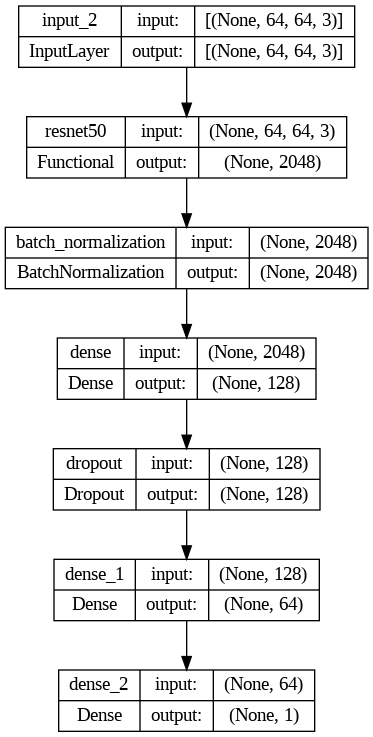

In [23]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [24]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/10
255/255 [==============================] - 73s 119ms/step - loss: 1.9800 - accuracy: 0.8017 - precision: 0.7908 - recall: 0.8199 - val_loss: 3.5254 - val_accuracy: 0.5094 - val_precision: 1.0000 - val_recall: 0.0224
Epoch 2/10
255/255 [==============================] - 42s 125ms/step - loss: 0.9722 - accuracy: 0.8532 - precision: 0.8495 - recall: 0.8569 - val_loss: 2.0920 - val_accuracy: 0.5684 - val_precision: 1.0000 - val_recall: 0.1221
Epoch 3/10
255/255 [==============================] - 40s 115ms/step - loss: 0.6073 - accuracy: 0.8612 - precision: 0.8616 - recall: 0.8632 - val_loss: 2.6586 - val_accuracy: 0.5347 - val_precision: 1.0000 - val_recall: 0.0582
Epoch 4/10
255/255 [==============================] - 40s 116ms/step - loss: 0.4718 - accuracy: 0.8707 - precision: 0.8673 - recall: 0.8782 - val_loss: 0.5716 - val_accuracy: 0.8201 - val_precision: 0.7425 - val_recall: 0.9832
Epoch 5/10
255/255 [=============

### 결과

In [27]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

64/64 [==============================] - 12s 19ms/step - loss: 0.2226 - accuracy: 0.9328 - precision: 0.9163 - recall: 0.9551
Val Loss: 0.2226
Val Accuracy: 0.9328
Val Precision: 0.9163
Val Recall: 0.9551


In [28]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

80/80 [==============================] - 12s 19ms/step - loss: 0.2226 - accuracy: 0.9330 - precision: 0.9116 - recall: 0.9569
test Loss: 0.2226
test Accuracy: 0.9330
test Precision: 0.9116
test Recall: 0.9569


### Saving Model

In [29]:
#모델 저장
ResNet_model.save('ResNet_c_model.h5')
model_json = ResNet_model.to_json()
with open('ResNet_model.json','w') as f:
  f.write(model_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
#모델 불러오기
ResNet_model = tf.keras.models.load_model('ResNet_c_model.h5')

### 평가 + 시각화

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = ResNet_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

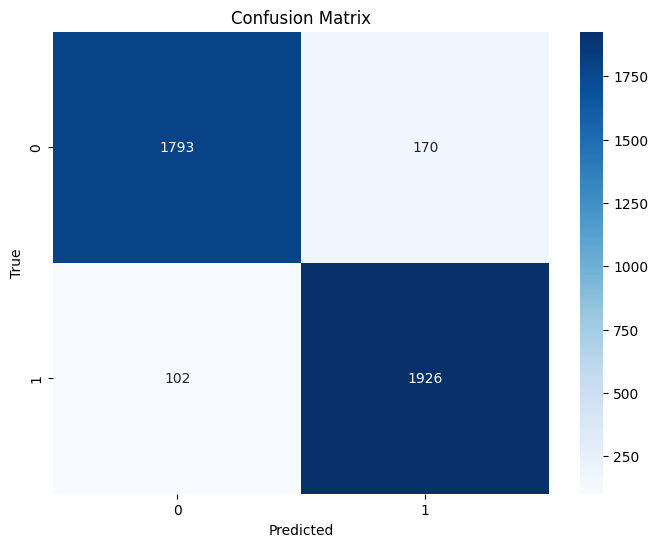

Accuracy: 0.9318466549736908
Precision: 0.9188931297709924
Recall: 0.9497041420118343
F1 Score: 0.9340446168768186


In [54]:
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

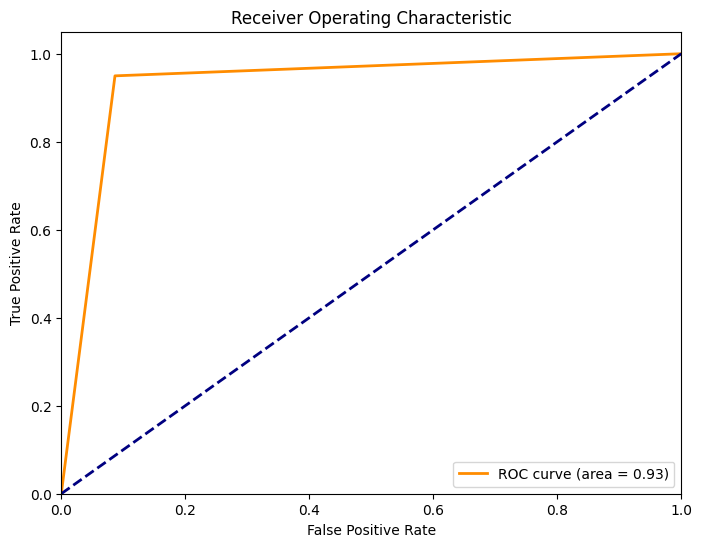

In [55]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1926
True Negative (TN): 1793
False Positive (FP): 170
False Negative (FN): 102


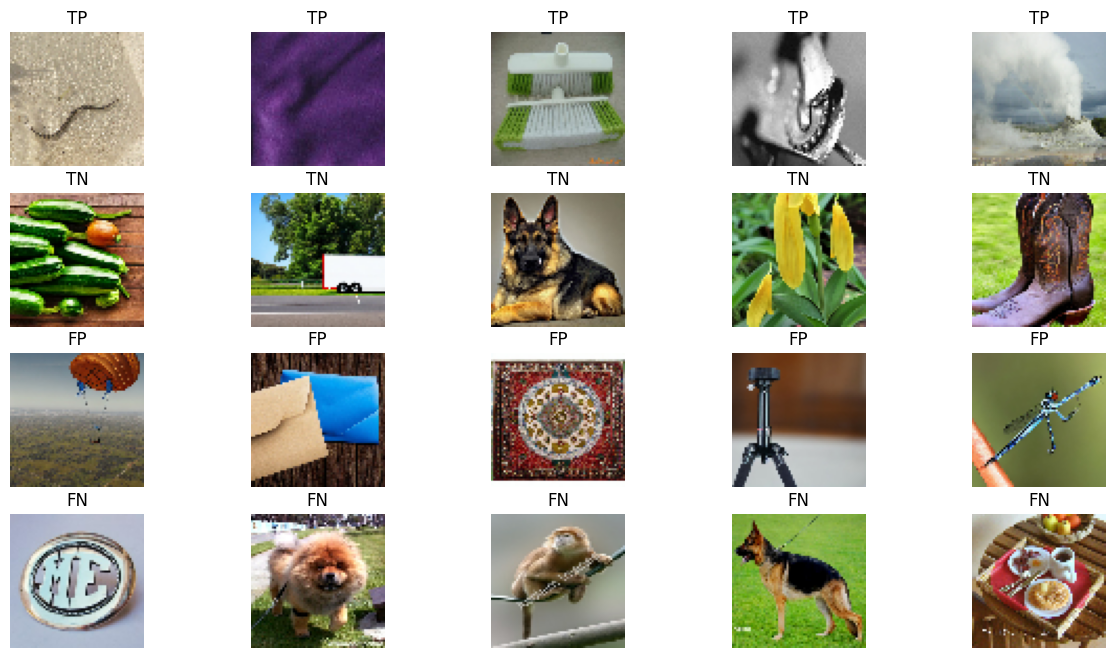

In [57]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

### Stable Diffusion 2.1 test

In [58]:
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(final_test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")


476/476 [==============================] - 13s 26ms/step - loss: 1.7461 - accuracy: 0.5232 - precision: 0.4659 - recall: 0.9208
test Loss: 1.7461
test Accuracy: 0.5232
test Precision: 0.4659
test Recall: 0.9208


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in final_test_dataset:
    predictions = ResNet_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

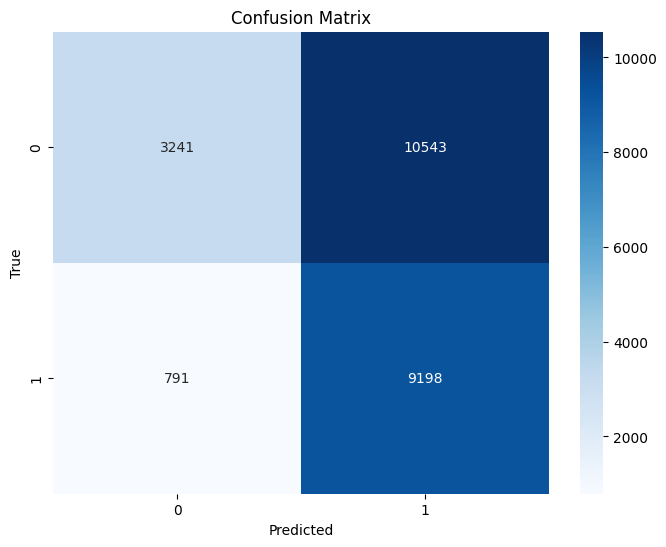

Accuracy: 0.5232406511588777
Precision: 0.46593384327035103
Recall: 0.920812894183602
F1 Score: 0.6187689202825429


In [64]:
_pred = np.array(y_pred)
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

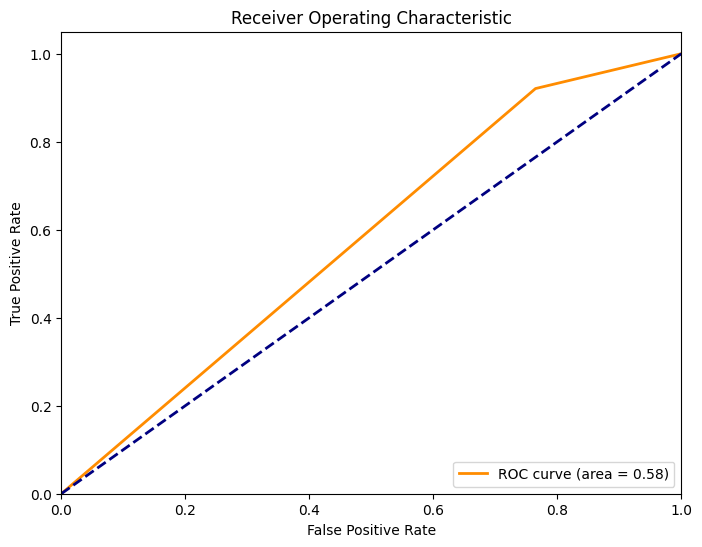

In [65]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [66]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 9198
True Negative (TN): 3241
False Positive (FP): 10543
False Negative (FN): 791


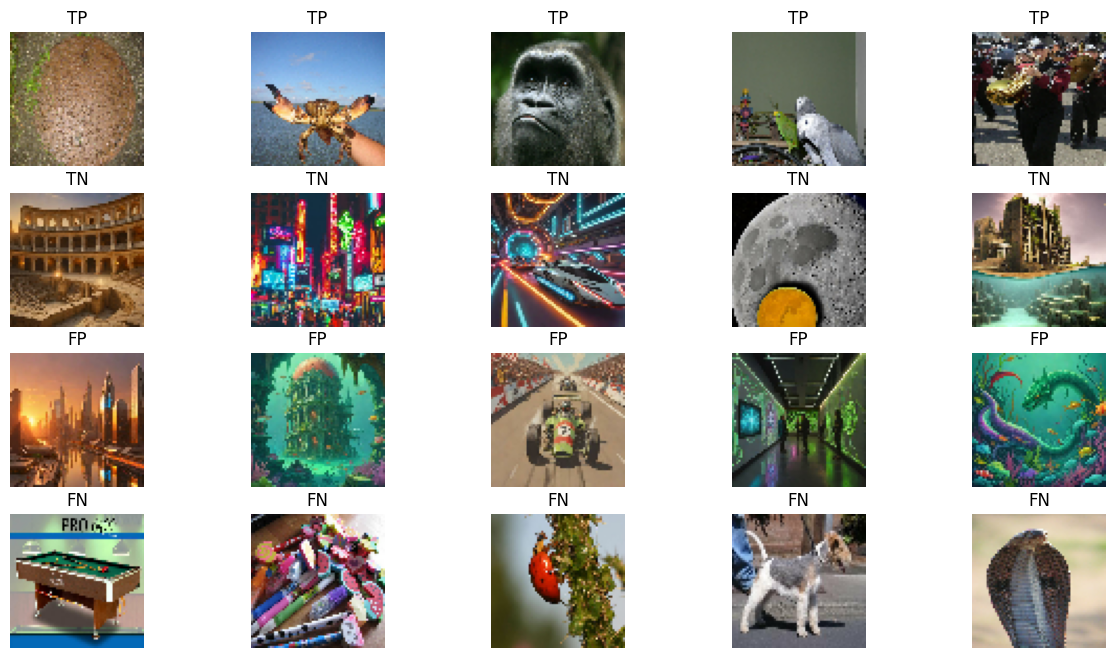

In [67]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

## **VGG16 모델**

In [68]:
# Building the Transfer Learning model using VGG16
VGG_base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
VGG_base_model.trainable = True



58889256/58889256 [==============================] - 3s 0us/step


In [69]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [70]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                           

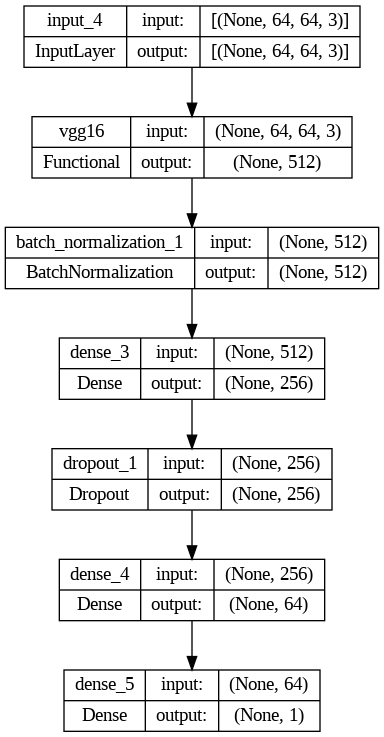

In [75]:
# Visualize the VGG model architecture
from IPython.display import Image

tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [76]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/10
255/255 [==============================] - 53s 135ms/step - loss: 2.2765 - accuracy: 0.6486 - precision_1: 0.6328 - recall_1: 0.7177 - val_loss: 1.8279 - val_accuracy: 0.4969 - val_precision_1: 0.4967 - val_recall_1: 1.0000
Epoch 2/10
255/255 [==============================] - 40s 118ms/step - loss: 1.0614 - accuracy: 0.7398 - precision_1: 0.7126 - recall_1: 0.8060 - val_loss: 1.1540 - val_accuracy: 0.5422 - val_precision_1: 0.5166 - val_recall_1: 0.9968
Epoch 3/10
255/255 [==============================] - 41s 119ms/step - loss: 0.7017 - accuracy: 0.7901 - precision_1: 0.7789 - recall_1: 0.8078 - val_loss: 0.7967 - val_accuracy: 0.6819 - val_precision_1: 0.6103 - val_recall_1: 0.9848
Epoch 4/10
255/255 [==============================] - 42s 123ms/step - loss: 0.5387 - accuracy: 0.8159 - precision_1: 0.8138 - recall_1: 0.8195 - val_loss: 0.6294 - val_accuracy: 0.7147 - val_precision_1: 0.9240 - val_recall_1: 0.4564
Epoc

### 결과

In [77]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

64/64 [==============================] - 12s 23ms/step - loss: 0.3100 - accuracy: 0.8834 - precision_1: 0.9507 - recall_1: 0.8058
val Loss: 0.3100
Val Accuracy: 0.8834
Val Precision: 0.9507
Val Recall: 0.8058


테스트셋으로 검증

In [78]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

80/80 [==============================] - 13s 23ms/step - loss: 0.3062 - accuracy: 0.8842 - precision_1: 0.9509 - recall_1: 0.8088
test Loss: 0.3062
test Accuracy: 0.8842
test Precision: 0.9509
test Recall: 0.8088


### Saving Model

In [79]:
VGG_model.save('VGG16_model.h5')  # 모델 구조와 가중치를 함께 저장

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
VGG_model = tf.keras.models.load_model('VGG16_model.h5')


### 평가 + 시각화

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = VGG_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

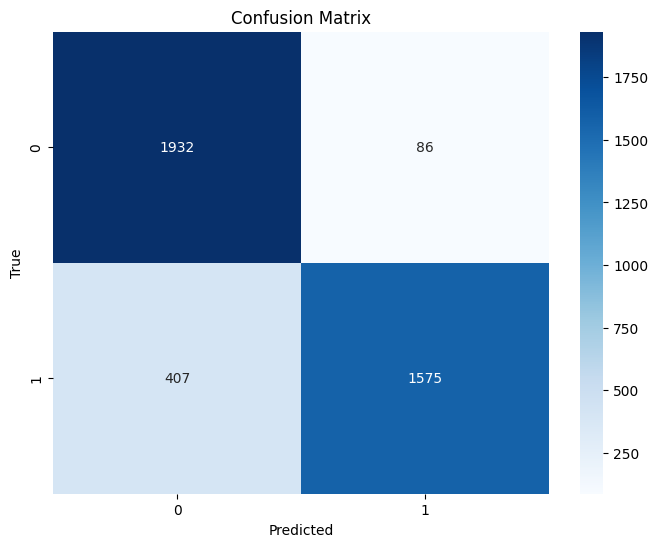

Accuracy: 0.87675
Precision: 0.9482239614689946
Recall: 0.7946518668012109
F1 Score: 0.8646719736480922


In [82]:
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

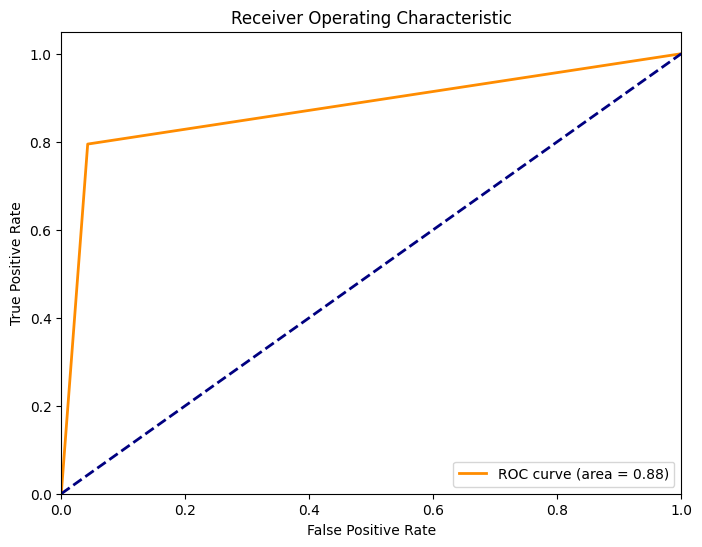

In [83]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [84]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1575
True Negative (TN): 1932
False Positive (FP): 86
False Negative (FN): 407


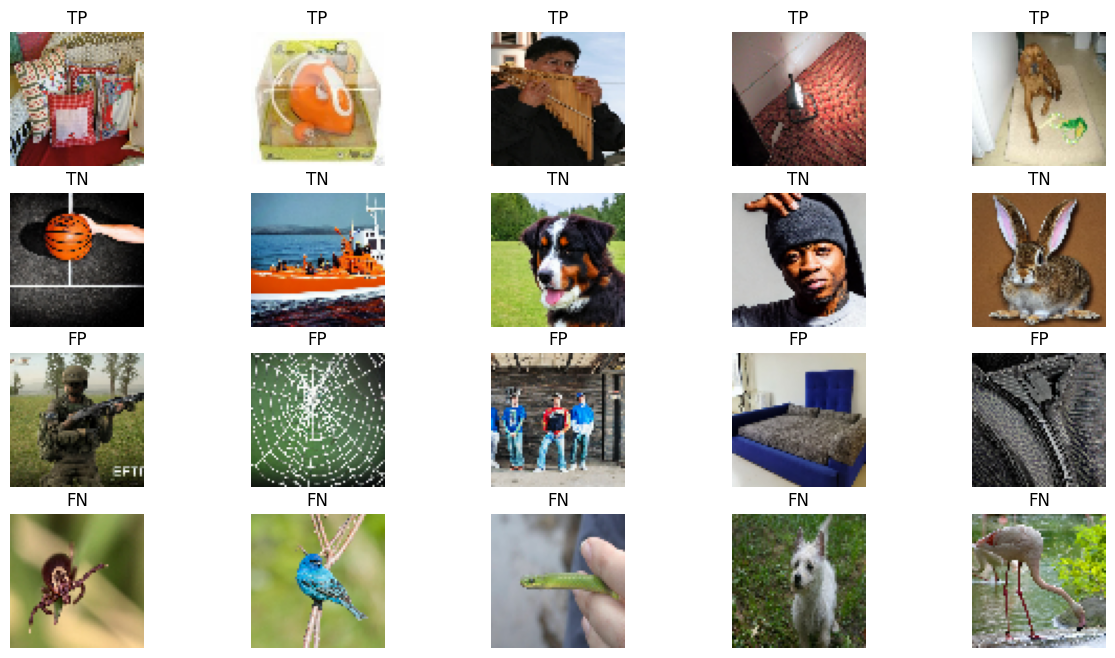

In [85]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

### Stable Diffusion 2.1 test

In [86]:
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(final_test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")


476/476 [==============================] - 15s 29ms/step - loss: 1.0215 - accuracy: 0.5689 - precision_1: 0.4918 - recall_1: 0.7830
test Loss: 1.0215
test Accuracy: 0.5689
test Precision: 0.4918
test Recall: 0.7830


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in final_test_dataset:
    predictions = VGG_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

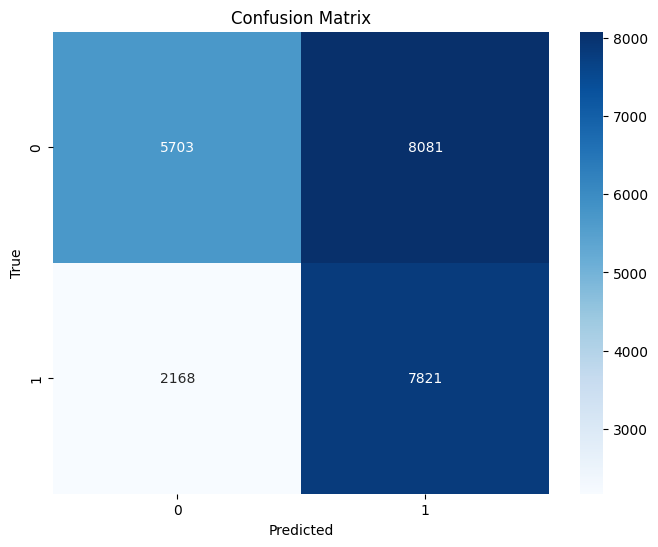

Accuracy: 0.5688806629369453
Precision: 0.49182492768205255
Recall: 0.7829612573831214
F1 Score: 0.6041481595921362


In [88]:
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

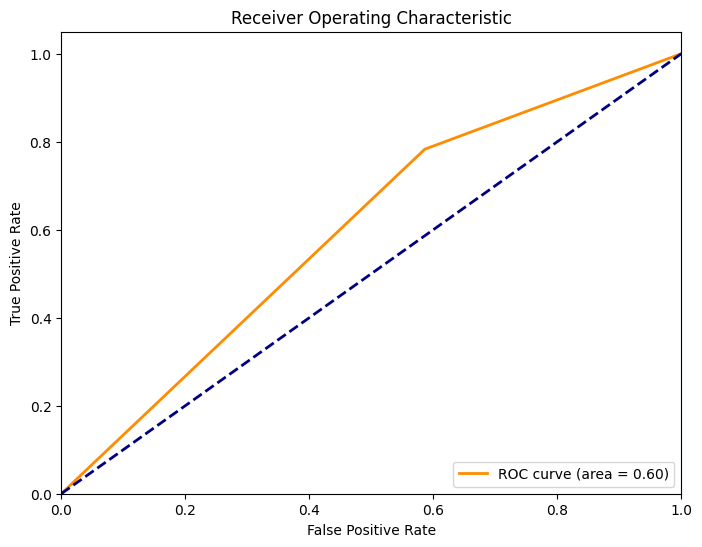

In [90]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [91]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 7821
True Negative (TN): 5703
False Positive (FP): 8081
False Negative (FN): 2168


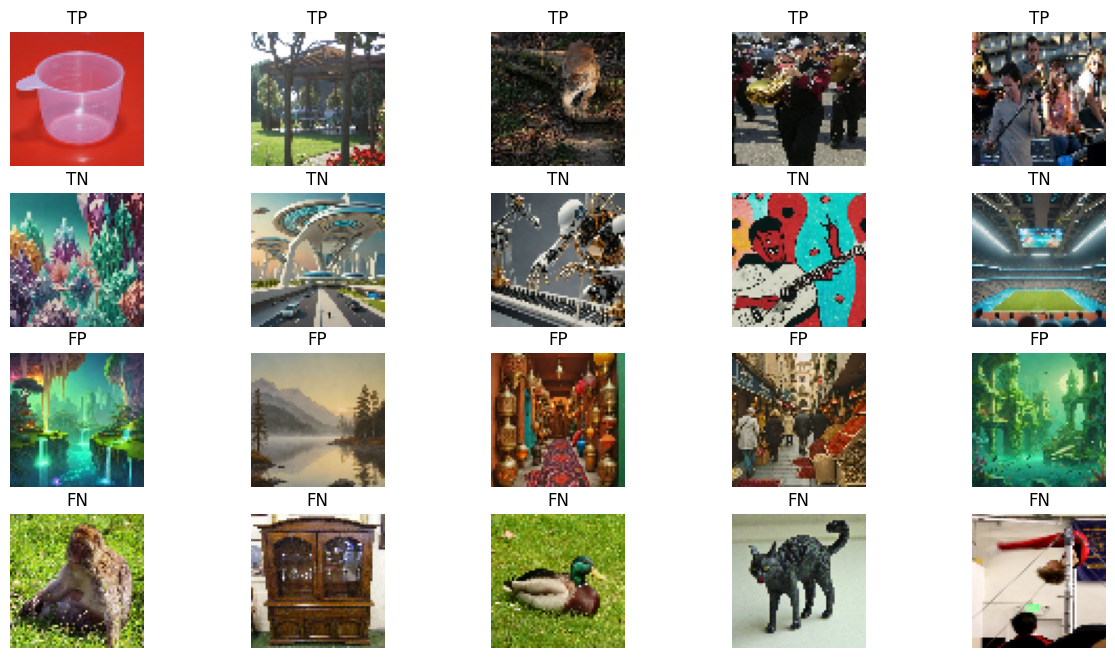

In [92]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()
